# 50. Магические квадраты

*Магическим квадратом* порядка $n$ называется $n\times n$ матрица $A=(a_{ij})$, заполненная числами от $1$ до $n$, такая, что сумма элементов в каждой строке, каждом столбце и на обеих диагоналях есть величина постоянная, равная, очевидно,
$$
M = \frac{n\,(n^2 + 1)}{2}.
$$
Величина $M$ называется *постоянной магического квадрата*.

Магического квaдрата порядка $2$ не существует.
Вот магический квадрат порядка $3$ (он единственен с точностью до поворотов и отражений):
$$
\left(
  \begin{array}{ccc}
  2 & 7 & 6 \\
  9 & 5 & 1 \\
  4 & 3 & 8  \\
  \end{array}
\right)  
$$

Сформулируйте задачу построения магического квадрата порядка $n$ как задачу целочисленного (булева) линейного программирования. Для этого введите булевы переменные $x_{ijk}$ ($i=1,2,\dots,n$; $j=1,2,\dots,n$; $k=1,2,\dots,n^2$), причем
$$
x_{ijk} = 1 \quad \Leftrightarrow \quad
a_{ij} = k.
$$

Как записать ограничения задачи? 
Они должны описывать следующие условия:

- в каждой клетке квадрата записано ровно одно число от $1$ до $n^2$ (одно ограничение);
- магический квадрат содержит все числа от $1$ до $n^2$ (одно ограничение);
- сумма элементов в каждой строке равна $M$ ($n$ ограничений);
- сумма элементов в каждом столбце равна $M$ ($n$ ограничений);
- сумма элементов на обеих диагоналях равна $M$ ($2$ ограничения).

Запишите условия задачи, используя язык моделирования, например,из библиотки `pulp` или другой подобной. Решите задачу средствами библиотеки для $n=3,4,5$ и, по желанию, при других $n$.

Сколько времени тратит ваша программа?
 

**Установка модулей, установка параметров и создание задачи:**

In [ ]:
!pip install pulp
from pulp import *
import time   # модуль для измерения времени работы

start_time = time.time()

n = 3              # высота/ширина квадрата
M = n*(n*n+1)/2    # постоянная магического квадрата

rows = cols = diags = range(1, n+1)
kvals = range(1, n*n + 1)

# создание задачи
prob = LpProblem("MagicSquare", LpMinimize)

# матрица A
a = [[-1 for i in range(n)] for j in range(n)]

# ввод булевых переменных
x = LpVariable.dicts("x", (rows, cols, kvals), cat=LpBinary)


**Ограничения:**

In [ ]:
# в каждой клетке квадрата записано ровно одно число от 1 до n^2
for i in rows:
    for j in cols:
        prob += lpSum([x[i][j][k] for k in kvals]) == 1

# магический квадрат содержит все числа от 1 до n^2
for k in kvals:
    prob += lpSum([x[i][j][k] for i in rows for j in cols]) == 1

# сумма элементов в каждой строке равна M
for k in kvals:
    for i in rows:
        prob += lpSum([x[i][j][k] for j in cols]) == M

# сумма элементов в каждом столбце равна M
for k in kvals:
    for j in cols:
        prob += lpSum([x[i][j][k] for i in rows]) == M

# сумма элементов на обеих диагоналях равна M  
for k in kvals:
    prob += lpSum([x[i][i][k] for i in rows]) == M

for k in kvals:
    prob += lpSum([x[i][n - i + 1][k] for i in rows]) == M

**Решение задачи и вывод результата:**

In [ ]:
prob.solve()
if prob.status == LpStatusOptimal:
    for i in rows:
        for j in cols:
            for k in kvals:
                if value(x[i][j][k]) == 1:
                    a[i - 1][j - 1] = k    # x[i][j][k] <=> a[i][j] = k
    for row in a:
        for val in row:
            print(str(val).rjust(2), end=' ')
        print()
else:
    print("Нет решений")
print("%s секунд" % round(time.time() - start_time, 3))

**Результат:**

(для каждого n программа запускалась отдельно)

In [ ]:
n = 3:
 4  3  8
 9  5  1
 2  7  6
0.308 секунд

n = 4:
13 12  8  1
 2  7 11 14
 3  6 10 15
16  9  5  4
1.176 секунд

n = 5:
 9  3 22 16 15 
 2 21 20 14  8 
25 19 13  7  1 
18 12  6  5 24 
11 10  4 23 17
9.074 секунд

n = 6:
17 32 15 10 19 18
31 35  2  6 11 26
20  1  5 27 36 22
 3  8 34 29  9 28
33 14 25 23 12  4
 7 21 30 16 24 13
29.277 секунд

**Вывод:**

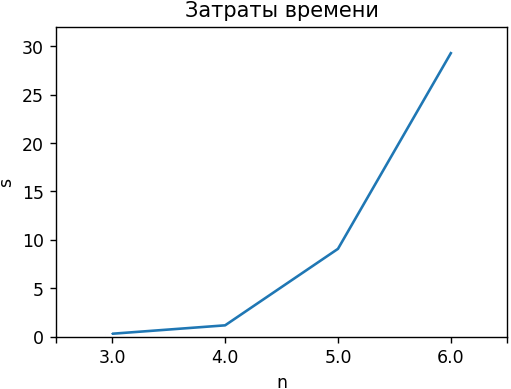
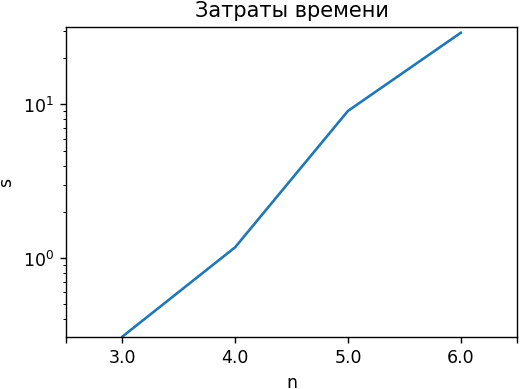

*По равномерной и логарифмической шкале.*

Судя по графикам, скорее всего, решение работает за $O(n*log(n))$ или $O(n^2)$.